# 執行順序：new data -> outer with encoding -> x_test -> Decision tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HTML final project/new_data.csv')
Train_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Train_IDs.csv')
Test_IDs = pd.read_csv('/content/drive/MyDrive/HTML final project/Test_IDs.csv')

# drop useless columns do not get better performance

In [ ]:
training_data = pd.merge(data, Train_IDs, on=["Customer ID"])

training_data = training_data[training_data['Satisfaction Score'] < 3] # Satisfaction Score < 3
print(training_data['Churn Category'].value_counts())

x_train = training_data.iloc[:, 2:-1]

x_train = x_train.fillna(x_train.median())
x_train = x_train.to_numpy()

y_train = training_data['Churn Category'].to_numpy()

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

y_train = y_train.astype('int')

1    171
3     74
2     59
4     37
5     33
Name: Churn Category, dtype: int64
x_train.shape:  (374, 44)
y_train.shape:  (374,)


# Satisfaction Score < 3 用 Churn Category 分 Satisfaction Score 平均值 和 中位數

In [ ]:
status = ['No Churn', 'Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other']
for i in range(6):
  print()
  print(status[i])
  print('sat score:')
  print('mean: ', training_data[training_data['Churn Category'] == i]['Satisfaction Score'].mean())
  print('median: ', training_data[training_data['Churn Category'] == i]['Satisfaction Score'].median())
  print('-----------------')


No Churn
sat score:
mean:  nan
median:  nan
-----------------

Competitor
sat score:
mean:  1.2573099415204678
median:  1.0
-----------------

Dissatisfaction
sat score:
mean:  1.3559322033898304
median:  1.0
-----------------

Attitude
sat score:
mean:  1.6081081081081081
median:  2.0
-----------------

Price
sat score:
mean:  1.4054054054054055
median:  1.0
-----------------

Other
sat score:
mean:  1.696969696969697
median:  2.0
-----------------


# x_test

In [ ]:
x_test = pd.read_csv('/content/drive/MyDrive/HTML final project/x_test.csv')
x_test = x_test[x_test['Satisfaction Score'] < 3] # Satisfaction Score < 3
x_test = x_test.fillna(x_test.median())
x_test = x_test.to_numpy()

print("x_test.shape: ", x_test.shape)

x_test.shape:  (239, 44)


# feature selection

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


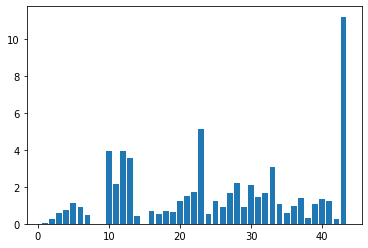

Index(['City', 'Latitude', 'Longitude', 'Internet Service',
       'Satisfaction Score'],
      dtype='object')

No Churn


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


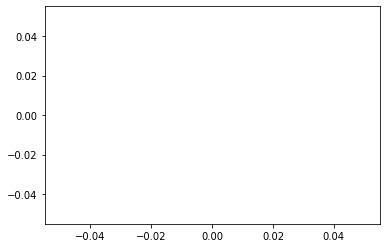

Index(['Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score'],
      dtype='object')

Competitor


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


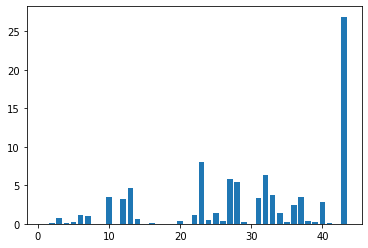

Index(['Internet Service', 'Online Backup', 'Device Protection Plan',
       'Streaming Music', 'Satisfaction Score'],
      dtype='object')

Dissatisfaction


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


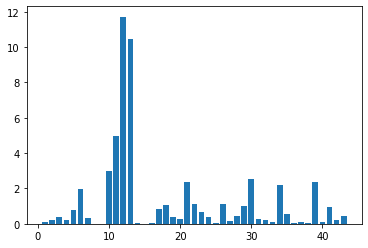

Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Streaming TV'], dtype='object')

Attitude


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


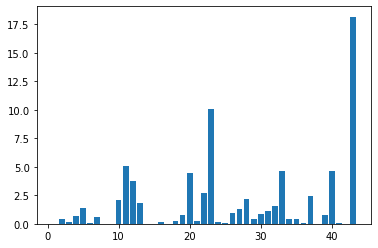

Index(['Zip Code', 'Internet Service', 'Unlimited Data',
       'Total Extra Data Charges', 'Satisfaction Score'],
      dtype='object')

Price


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


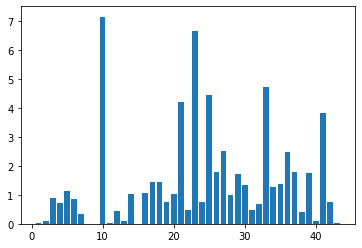

Index(['City', 'Avg Monthly Long Distance Charges', 'Internet Service',
       'Avg Monthly GB Download', 'Unlimited Data'],
      dtype='object')

Other


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0  8  9 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


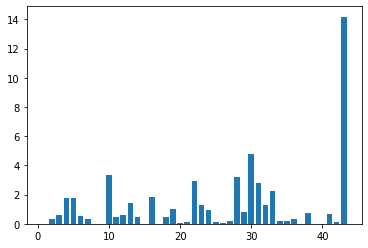

Index(['City', 'Multiple Lines', 'Device Protection Plan', 'Streaming TV',
       'Satisfaction Score'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

status = ['No Churn', 'Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other']

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
cols = fs.get_support(indices=True)
print(data.columns[cols+2])

for i in range(6):
  print()
  print(status[i])
  y_train_i = np.where(y_train == i, 1, -1)
  x_train_fs, x_test_fs, fs = select_features(x_train, y_train_i, x_test)
  # what are scores for the features
  # for i in range(len(fs.scores_)):
  # 	print('Feature %d: %f' % (i, fs.scores_[i]))
  # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  pyplot.show()
  cols = fs.get_support(indices=True)
  print(data.columns[cols+2])
# features_df_new = features_df.iloc[:,cols]


# 各式各樣 classifier
* LGBM: 0.83
* XGB 0.82
* 貓貓 classifier 0.81
* GDB use x_train median: 0.82758
* GDB usw x_test median: 0.82988





In [ ]:
# x_train, x_test, fs = select_features(x_train, y_train_i, x_test)
from sklearn.model_selection import train_test_split
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2)
y_val_train = np.where(y_val_train == 3, 1, -1)
y_val_test_real_label = y_val_test
y_val_test = np.where(y_val_test == 3, 1, -1)

# !pip install catboost
# from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# CAT = CatBoostClassifier
MLP = MLPClassifier()
NB = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()
SVCCC = SVC()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SGD = SGDClassifier()
ADA = AdaBoostClassifier()
DT = DecisionTreeClassifier()
RF = BaggingClassifier(DT)
XGB = XGBClassifier()
LGBM = LGBMClassifier()
GDB = GradientBoostingClassifier()

clf_lst = [MLP, NB, QDA, SVCCC, LR, KNN, SGD, ADA, DT, RF, XGB, LGBM, GDB]
clf_lst_name = ['MLP', 'NB', 'QDA', 'SVCCC', 'LR', 'KNN', 'SGD', 'ADA', 'DT', 'RF', 'XGB', 'LGBM', 'GDB']
# clf_lst = [ADA, DT, XGB, LGBM, GDB]
val_acc_lst = []

for clf in clf_lst:
  val_clf = clf.fit(x_val_train, y_val_train)
  # print(f'{clf}: ', clf.feature_importances_)
  val_y_predicted = val_clf.predict(x_val_test)
  val_acc = metrics.accuracy_score(y_val_test, val_y_predicted)
  val_acc_lst.append(val_acc)
  print(f'{clf} false: ')
  print('truth:     ', y_val_test_real_label[(y_val_test != val_y_predicted)])
  print('predicted: ', val_y_predicted[(y_val_test != val_y_predicted)])
  print(f'{clf} true: ')
  print(y_val_test[(y_val_test == val_y_predicted)])
  print()

print()
print("acc:")
for i in range(len(clf_lst)):
  print(f'{clf_lst_name[i]:}: {val_acc_lst[i]}')

MLPClassifier() false: 
truth:      [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
predicted:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
MLPClassifier() true: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]

GaussianNB() false: 
truth:      [3 1 3 3 3 3 4 3 1 3 3 3 3 1 3 3 3 5 3 3 3 1 3 3 1 3 3 1]
predicted:  [-1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1
  1 -1 -1  1]
GaussianNB() true: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

QuadraticDiscriminantAnalysis() false: 
truth:      [3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 2 4 3 3 3 3 1 1 1]
predicted:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1]
QuadraticDiscriminantAnalysis() true: 
[-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AdaBoostClassifier() false: 
truth:      [3 3 3 3 3 4 3 1 3 3 3 3 3 3 3 1 3 5 3 3 3 3 3 3 3]
predicted:  [-1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1]
AdaBoostClassifier() true: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]

DecisionTreeClassifier() false: 
truth:      [3 1 3 3 3 3 4 3 1 3 1 3 3 3 3 3 3 5 3 1 3 1 3 3 1 1 3 3]
predicted:  [-1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1
  1  1 -1 -1]
DecisionTreeClassifier() true: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1]

BaggingClassifier(base_estimator=DecisionTreeClassifier()) false: 
truth:      [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3]
predicted:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
BaggingClassifier(base_estimator=DecisionTreeClass

In [ ]:
# change here to predict testing data by best classifier
test_clf = GDB.fit(x_train, y_train)
test_y_predicted = test_clf.predict(x_test)

In [ ]:
# Test_IDs["Churn Category"] = test_y_predicted
# Test_IDs.to_csv('/content/drive/My Drive/HTML final project/dtreeeee.csv', index=False)